## Описание проекта "Стартап продукты питания"

<br>**Описание проекта:** дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. <br>Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми.

<br> **Цель:** изучить воронку продаж и понять, как пользователи доходят до покупки.
<br> **Задачи:**
<br> 1. провести A/A/B-тест
<br> 2. выяснить какой шрифт лучше 

<br>**Описание данных**
<br>Каждая запись в логе — это действие пользователя, или событие.
<br>EventName — название события;
<br>DeviceIDHash — уникальный идентификатор пользователя;
<br>EventTimestamp — время события;
<br>ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

## Подготовка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math as mth
from scipy import stats as st
from plotly import graph_objects as go
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# скачиваем датасет и сохраняем в переменной df
df = pd.read_csv('logs_exp.csv', sep='\t')

In [3]:
# изучаем общую информацию о файле
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

In [4]:
# редактируем  названия столбцов
df.columns = ['event_name', 'user_id', 'datetime', 'group']
# переводим данные в формат даты и времени
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')
# добавляем столбец с датой
df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')

In [5]:
# проверяем и удаляем дубликаты в данных
display('Количетсво дубликатов до обработки:',df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
display('Количетсво дубликатов после обработки:',df.duplicated().sum())

'Количетсво дубликатов до обработки:'

413

'Количетсво дубликатов после обработки:'

0

In [6]:
# проверяем наличие пропусков
display(f'Количетсво пропусков:', df.isna().sum())

'Количетсво пропусков:'

event_name    0
user_id       0
datetime      0
group         0
date          0
dtype: int64

**Вывод:** На данном этапе мы изучили данные и их структуру, проверили наличие пропусков и дубликатов. Удалили 413 дубликатов, переименовали названия столбцов, привели типы данных к соответсвию. Теперь датасет готов к дальнейшему анализу.

## Изучение и проверка данных

In [8]:
# узнаем общее количество событий, пользователей в логе
display(f'Количетсво событий в логе:',df['event_name'].count())
display(f'Количетсво пользователей в логе:',df['user_id'].nunique())
display(f'Количетсво событий на пользователя в среднем:',df.groupby('user_id')['event_name'].agg('count').mean())

'Количетсво событий в логе:'

243713

'Количетсво пользователей в логе:'

7551

'Количетсво событий на пользователя в среднем:'

32.27559263673685

In [9]:
# вычисляем минимальную и максимальную дату событий
display ('Мы располагаем данными за период с {} по {}.'.format(df['date'].min(), df['date'].max()))

'Мы располагаем данными за период с 2019-07-25 по 2019-08-07.'

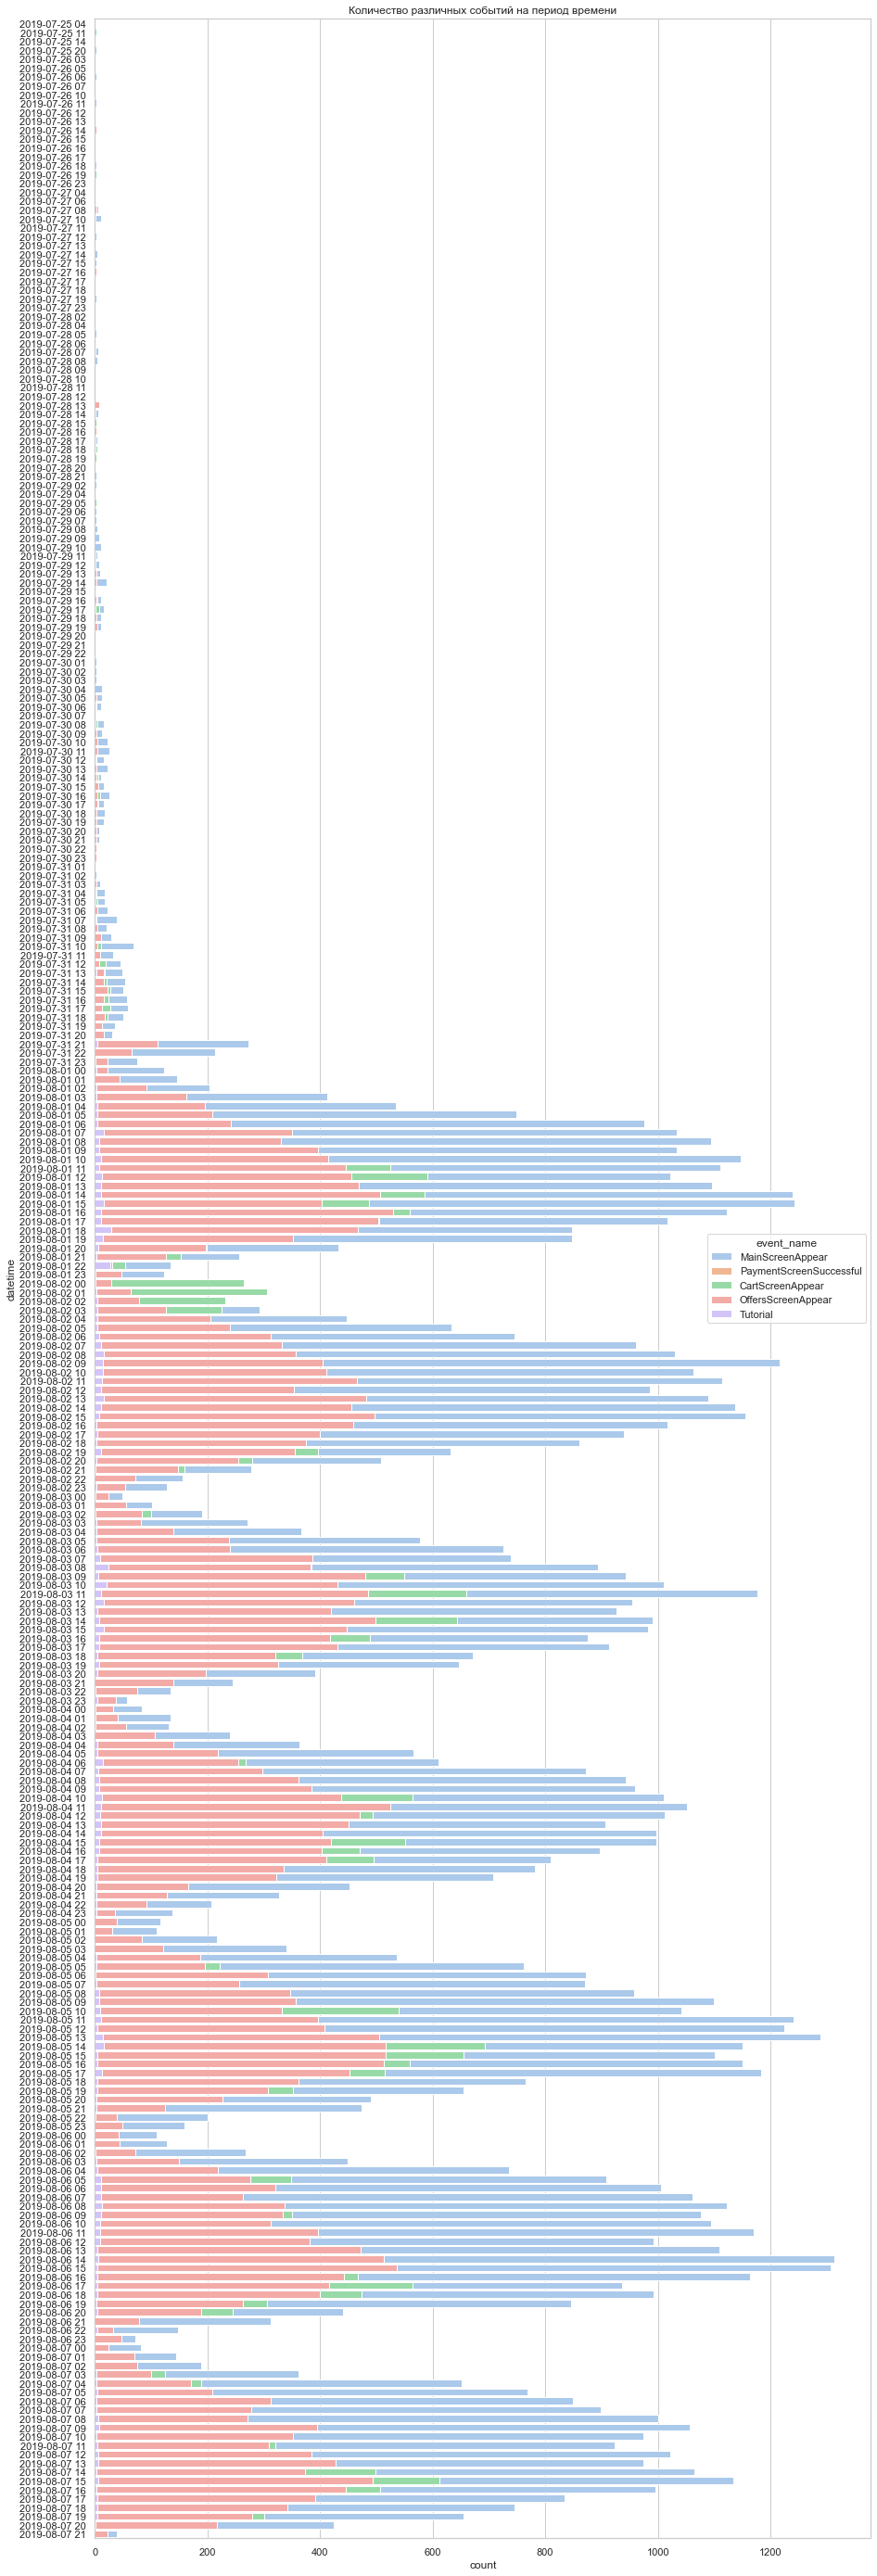

In [10]:
# стороим график событий за весь период времени
plt.figure(figsize=(15, 50))
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.countplot(y=df['datetime'].dt.strftime('%Y-%m-%d %H'), hue='event_name', data=df, dodge=False)
ax.set_title('Количество различных событий на период времени')
plt.show()


Перед нами логи за период с 2019-07-25 04:43:36 по 2019-08-07 21:15:17. Всего событий в логе 241724. Всего пользователей в логе 7538. В среднем на пользователя приходится 32 событий.
Глядя на гистограмму по дате и времени, мы видим, что у нас одинаково полные данные только за период с 2019-07-31 21:00 по 2019-08-07 21:00.



In [12]:
df = df['2019-07-31 21:00' <= df['datetime']]
display('Дальнейший анализ будет проводиться для данных в период с {} по {}.'.format(df['datetime'].min(), df['datetime'].max()))
display(f'Количетсво событий в логе:',df['event_name'].count())
display(f'Количетсво пользователей в логе:',df['user_id'].nunique())
display(f'Количетсво событий на пользователя в среднем:',df.groupby('user_id')['event_name'].agg('count').mean())

'Дальнейший анализ будет проводиться для данных в период с 2019-07-31 21:00:57 по 2019-08-07 21:15:17.'

'Количетсво событий в логе:'

241724

'Количетсво пользователей в логе:'

7538

'Количетсво событий на пользователя в среднем:'

32.06739188113558

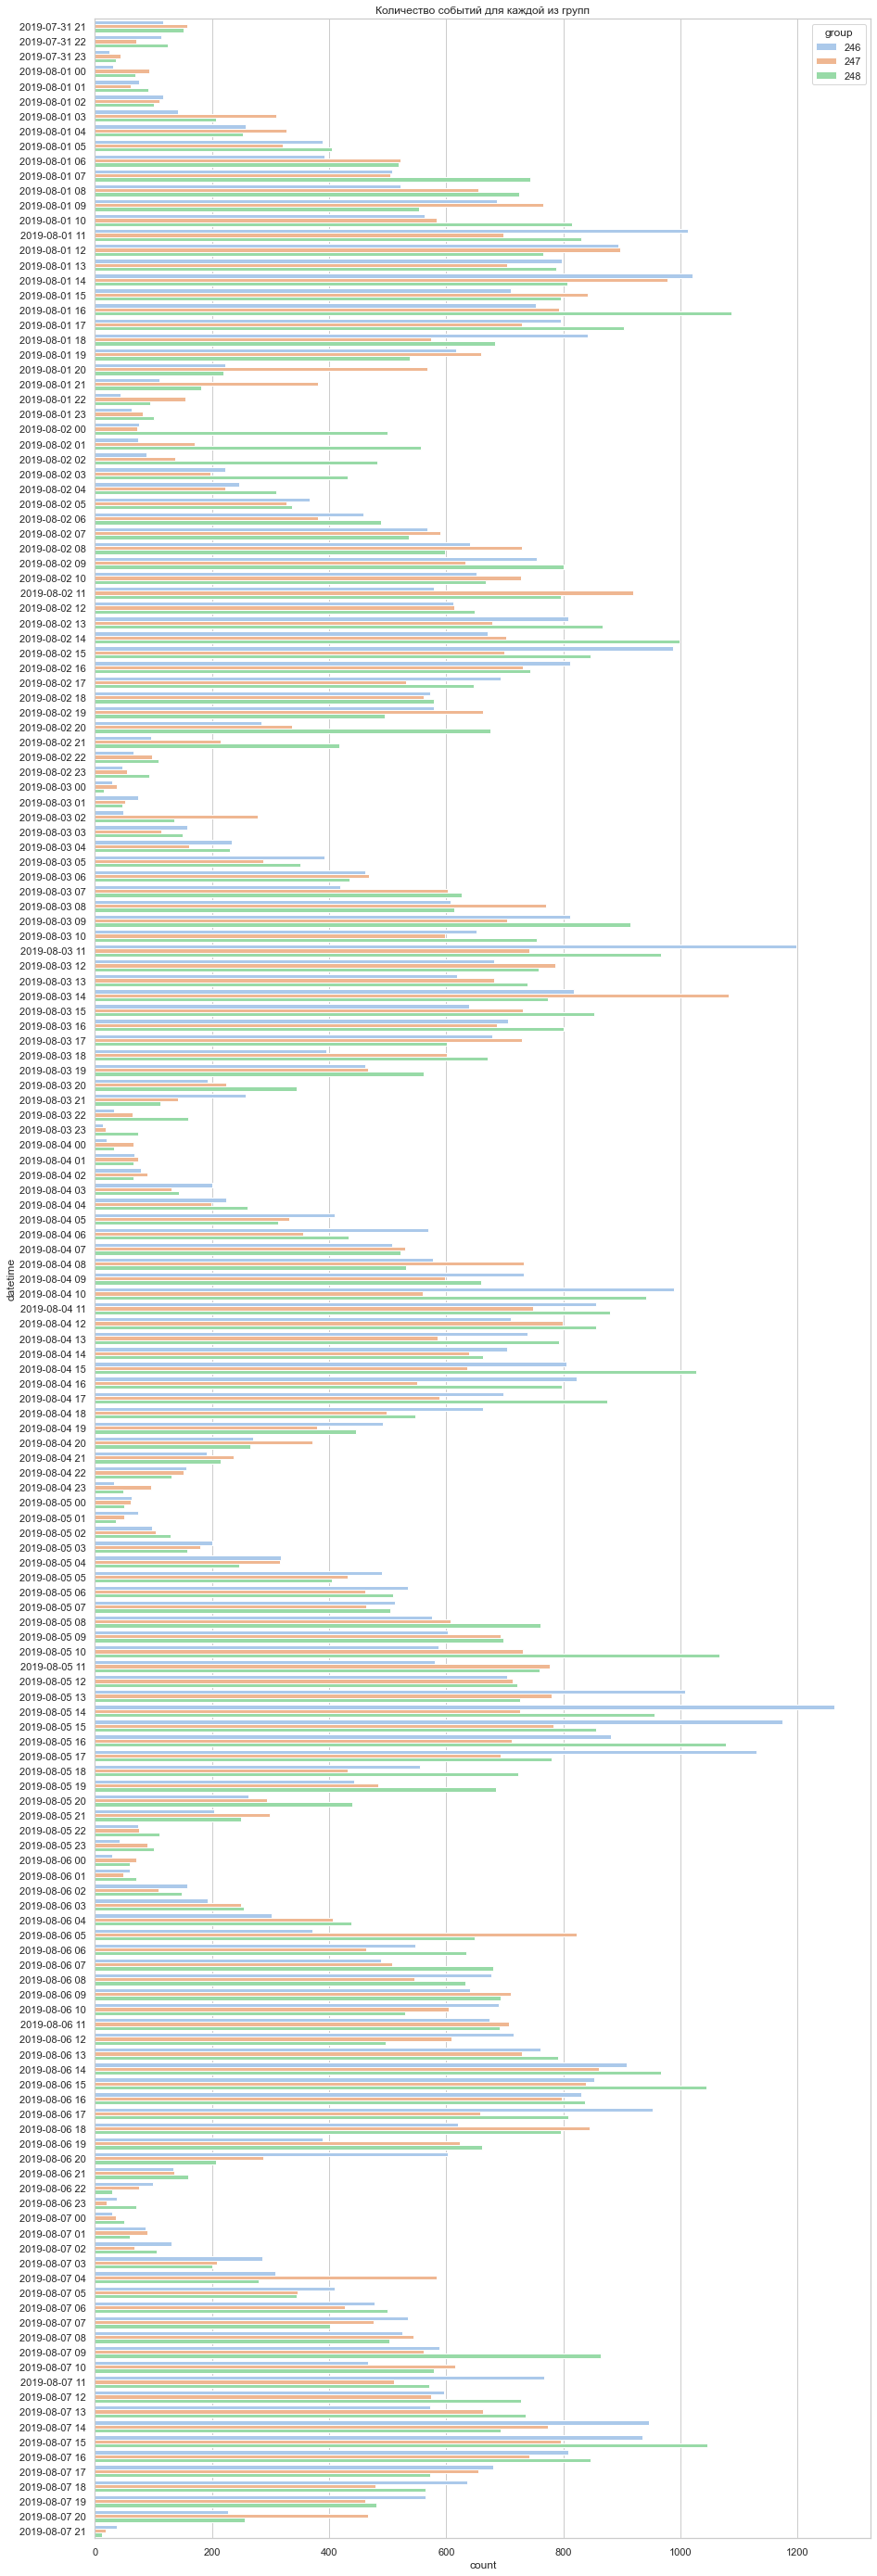

In [13]:
# стороим график событий за весь период времени обновленный

plt.figure(figsize=(15, 50))
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.countplot(y=df['datetime'].dt.strftime('%Y-%m-%d %H'), hue='group', data=df)
ax.set_title('Количество событий для каждой из групп')
plt.show()

<br>**Вывод:** Отбросив страрые данные мы избавились от менее 1% данных, также согласно гистограмме мы видиим, что в данных есть пользователи из трех представленнх групп. 

<br>Мы имеем:  
<br>1. событий в логе - 241724
<br>2. пользователей в логе - 7538
<br>3. событий на пользователя в среднем - 32.0

## Воронки событий

In [14]:
# посморим, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
events = df.groupby('event_name')['user_id'].agg(['count', 'nunique']).reset_index()
events.columns =['event_name', 'num_events', 'num_users']
num_users = {'all': df['user_id'].nunique(), 
           246: df[df['group']==246]['user_id'].nunique(),
           247: df[df['group']==247]['user_id'].nunique(),
           248: df[df['group']==248]['user_id'].nunique(),
          '249': df[(df['group']==246) | (df['group']==247)]['user_id'].nunique()}
order = events.sort_values('num_events', ascending=False).reset_index(drop=True)

order

event_name  num_events  num_users
0         MainScreenAppear      117889       7423
1       OffersScreenAppear       46531       4597
2         CartScreenAppear       42343       3736
3  PaymentScreenSuccessful       33951       3540
4                 Tutorial        1010        843

### Количество пользователей, совершавшие каждое событие

<Figure size 432x288 with 0 Axes>

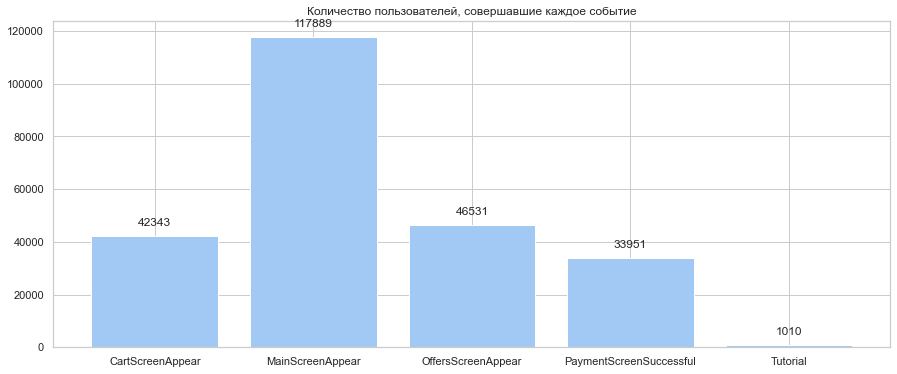

In [15]:
# посчитаем, сколько пользователей совершали каждое из этих событий.

plt.clf()

plt.figure(figsize=(15, 6))
       
xs = events['event_name']
ys = events['num_events']

plt.bar(xs,ys)
plt.title('Количество пользователей, совершавшие каждое событие')
for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 

plt.show();


**Вывод:**
1. Самое частое событие это появление основного экрана(MainScreenAppear) случалось 117889 раз.
2. Второе по популярности событие это появление экрана с каталогом продуктов(OffersScreenAppear) случалось 46531 раз.
3. Третье по популярности событие это появление экрана с корзиной(CartScreenAppear) случалось 42343 раза.
4. Четвёртое по популярности событие это появление экрана с успешной оплатой(PaymentScreenSuccessful) случалось 33951 раз.
5. Пятое по популярности событие это открытие руководства пользователя(Tutorial) случалось 1010 раз.

### Количество и доля пользователей, совершавшие каждое событие хоть раз

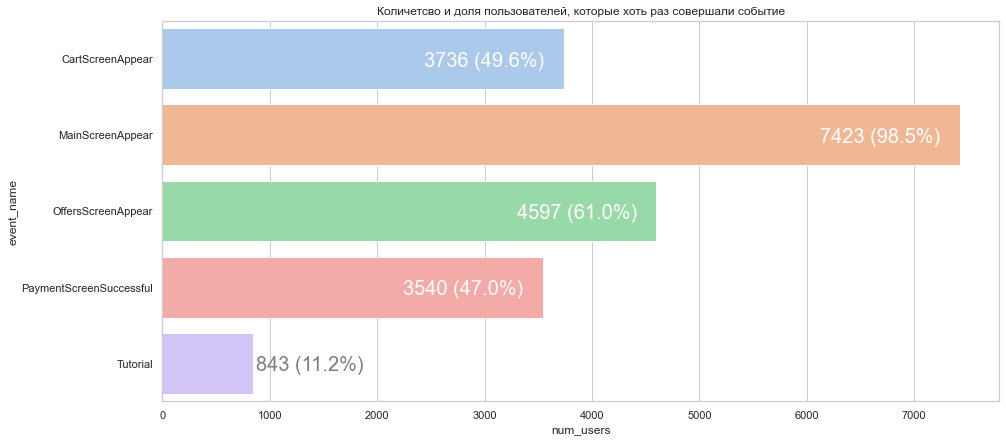

In [16]:
# посчитаем количетсво и долю пользователей, которые хоть раз совершали событие.
plt.figure(figsize=(15, 7))
ax = sns.barplot(y='event_name', x='num_users',  data=events)
ax.set_title('Количетсво и доля пользователей, которые хоть раз совершали событие')
for i in ax.patches:
    if i.get_width() > 3000:
        ax.text(i.get_width()-1300, i.get_y()+0.5, 
            str(int(i.get_width()))+' ({:.1%})'.format(i.get_width() / num_users['all']), fontsize=20, color='white')
    else:
        ax.text(i.get_width()+30, i.get_y()+0.5, 
            str(int(i.get_width()))+' ({:.1%})'.format(i.get_width() / num_users['all']), fontsize=20, color='grey')
plt.show()

<br><b>Вывод:</b>
<br>1. 7423 пользователя хотя бы раз открывали главную страницу приложения(MainScreenAppear) это 98,5% всех пользователей.
<br>2. 4597 пользователей хотя бы раз открывали страницу с каталогом товаров(OffersScreenAppear) это 61% всех пользователей. 39% пользователей не увидели даже каталог товаров стоит выяснить причину, возможно приложение не на всех устройствах работает корректно.
<br>3. 3736 пользователей хотя бы раз открывали корзину(CartScreenAppear) это 49,6% всех пользователей.
<br>4. 3540 пользователей хотя бы раз попадали на страницу с успешной оплатой(PaymentScreenSuccessful) это 47% всех пользователей.
<br>5. 843 пользователя хотя бы раз открывали руководство пользователя(Tutorial) это 11,2% всех пользователей.


### Последовательность событий

*Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.*

<br>Предположим, что пользователь совершает последовательно следующие шаги: 
<br> → открывает главную страницу приложения(MainScreenAppear) 
<br> → далее в каталоге выбирает товары(OffersScreenAppear) 
<br> → кладёт их в корзину(CartScreenAppear) 
<br> → оплачивает(PaymentScreenSuccessful).


### Количество и доля пользователей, проходящие на следующий шаг воронки по группам

In [17]:
# посчитаем количетсво и долю пользователей, которые проходят на следующий шаг воронки .
event_pivot=df.pivot_table(index=['event_name','group'], values='user_id', aggfunc=['count', 'nunique']).reset_index()
event_pivot.columns= ['event_name','group', 'num_events', 'num_users']
order = (events[events['event_name'] != 'Tutorial']
         .sort_values('num_events', ascending=False)['event_name']
         .reset_index(drop=True))
groups = [246, 247, 248]
simple_funnel = {}
for group in groups:
    simple_funnel[group] =[]
    for event in order:
        simple_funnel[group].append(df[(df['group'] == group) & (df['event_name'] == event)]['user_id'].nunique())
fig = go.Figure()
for i, group in enumerate(groups):
    fig.add_trace(go.Funnel(
        name = str(group),
        y = (event_pivot[(event_pivot['group'] == group) & (event_pivot['event_name'] != 'Tutorial')]
             .sort_values('num_users', ascending=False)['event_name']),
        x = (event_pivot[(event_pivot['group'] == group) & (event_pivot['event_name'] != 'Tutorial')]
             .sort_values('num_users', ascending=False)['num_users']),
        textposition = "inside",
        textinfo = "value+percent initial"))

fig.show()

<br><b>Вывод:</b>
<br>Согласно построенной воронке можно заключить, что больше всего пользователей <b>(37% для группы 246 и 39% для групп 247 и 248)</b> уходят от нас посмотрев на главный экран(MainScreenAppear) и даже без перехода к каталогу товаров(OffersScreenAppear). Это может говорить о том что интерфейс основной страницы неудобен или некорректно отображается на части устройств, хорошо бы запросить данные о моделях устройств и проверить нет ли зависимости оттока пользователей от устройств.
<br>От первого события до оплаты доходит меньше половины пользователей <b>(49%/47%/47% для групп 246/247/248 соответственно)</b>.

## Изучение результатов эксперимента

In [18]:
display('Для A/A/B-теста пользователей разбили на 3 группы: '
      '2 контрольные(246 и 247) со старыми шрифтами и одну экспериментальную(248) — с новыми.')

for group in groups:
    num_users
    display('В {} группе {} пользователей'.format(group, num_users[group]))

'Для A/A/B-теста пользователей разбили на 3 группы: 2 контрольные(246 и 247) со старыми шрифтами и одну экспериментальную(248) — с новыми.'

'В 246 группе 2484 пользователей'

'В 247 группе 2517 пользователей'

'В 248 группе 2537 пользователей'

**Комментарий:** Количество пользователей в различных группах различается не более, чем на 1%

In [19]:
simple_funnel = pd.DataFrame(simple_funnel)
simple_funnel['249'] = simple_funnel[246] + simple_funnel[247]
simple_funnel['event_name'] = order

In [20]:
# проверим, находят ли статистические критерии разницу между выборками 246 и 247

def z_value_diff(first_group, second_group, alpha=0.05):
    for i in simple_funnel.index:
        p1 = simple_funnel[first_group][i] / num_users[first_group]
        # пропорция успехов во второй группе:
        p2 = simple_funnel[second_group][i] / num_users[second_group]
        # пропорция успехов в комбинированном датасете:
        p_combined = ((simple_funnel[first_group][i] + simple_funnel[second_group][i]) / 
                      (num_users[first_group] + num_users[second_group]))
        # разница пропорций в датасетах
        difference = p1 - p2
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/num_users[first_group] + 1/num_users[second_group]))
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(simple_funnel['event_name'][i], p_value))
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        else:
            print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        print('')
        
    fig = go.Figure()
    for i, group in enumerate([first_group, second_group]):
        fig.add_trace(go.Funnel(
            name = str(group),
            y = order,
            x = simple_funnel[group],
            textposition = "inside",
            textinfo = "value+percent initial"))

    fig.show()

### Гипотезы

<br>**H0** - между долями групп 246 и 247 есть значимая разница
<br>**H1** - между долями групп 246 и 247 нет значимой разницы

In [21]:
z_value_diff(246,247)

MainScreenAppear p-значение: 0.6756217702005545
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.26698769175859516
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.2182812140633792
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.10298394982948822
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



**Вывод**: Ни для оного из событий разница не оказалось значимой обе эти группы можно считать контрольными.

*Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию.*


<br>**H0** - между долями групп 246 и 248 есть значимая разница
<br>**H1** - между долями групп 246 и 248 нет значимой разницы

In [22]:
# Группы 246 и 248:
z_value_diff(246,248)

MainScreenAppear p-значение: 0.34705881021236484
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.08328412977507749
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.22269358994682742
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



**Вывод**: Значимой разницы между контрольной группой 246 и экспериментальной группой не выявлено.

<br>**H0** - между долями групп 247 и 248 есть значимая разница
<br>**H1** - между долями групп 247 и 248 нет значимой разницы

In [23]:
# Группы 247 и 248:
z_value_diff(247,248)

MainScreenAppear p-значение: 0.6001661582453706
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.8835956656016957
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.6169517476996997
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.6775413642906454
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



**Вывод**: Значимой разницы между контрольной группой 247 и экспериментальной группой не выявлено.

<br>**H0** - между долями групп 249 и 248 есть значимая разница
<br>**H1** - между долями групп 249 и 248 нет значимой разницы

In [24]:
z_value_diff('249',248)

MainScreenAppear p-значение: 0.39298914928006035
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.418998284007599
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.19819340844527744
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.6452057673098244
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



<br>**Вывод:** 
<br>Мы провели 16 проверок статистических гипотез с уровнем значимости 0.05 (12 из них проверяли разницу между контрольными группами и группой с изменённым шрифтом) и ни одна из них не выявила значимой разницы.

<br>При уровне значимости 0.1 только одна из проверок покажет значимую разницу, между контрольной группой 246 и экспериментальной в доле перехода пользователей в корзину(CartScreenAppear), но эта разница будет не в пользу нашей экспериментальной группы. 
<br>Но при уровне значимости 0.1 каждый десятый раз можно получать ложный результат, поэтому стоит применить изначально выбранный нами уровень значимости 0.05.

## Общий вывод

При начальном изучении данных мы приняли решение отбросить неполные данные и оставить период с 31-07-2019 21 часа, мы это сделали потому что технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные».

При исследовании воронки событий мы выяснили, что от первого события до оплаты доходит меньше половины пользователей (49%/47%/47% для групп 246/247/248 соответственно)
100% всех пользователей хотя бы раз открывали главную страницу приложения.
Только 4597 пользователей хотя бы раз открывали страницу с каталогом товаров (39% пользователей не увидели даже каталог товаров необходимо выяснить причину, возможно приложение не на всех устройствах работает корректно).

Мы провели проверки между контрольными группами статистических гипотез с уровнем значимости 0.05 и ни одна из них не выявила значимой разницы.

Исходя из результатов данного A/A/B-эксперимента, мы можем судить, что на поведение пользователей изменение шрифта значимого эффекта не оказало. Что можно считать успехом, т.к. целью было узнать не отпугнут ли изменения пользователей. В то же время учитывая результаты эксперимента, если изменение шрифта не продиктовано проблемами в работе приложения, его можно не менять.